# sklearn nâng cao

## Feature engineering

`Feature engineering` là quá trình biến đối dữ liệu thô thành các dữ liệu phái sinh (`features`) có thể thể hiện tốt hơn vấn đề cần giải quyết trong mô hình dự báo, từ đó gia tăng độ chính xác của mô hình trên tập dữ liệu mới.

`Feature engineering` có 4 nhóm lớn:
- Dữ liệu dạng số
- Dữ liệu dạng category
- Dữ liệu text
- Dữ liệu dạng ảnh

### Dữ liệu dạng số

#### Chuyển sang dạng nhị phân (0,1)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Binarizer

In [2]:
iris = pd.read_csv("./99_dataset/iris.csv")
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [3]:
# Tạo object binarizer
thre = np.mean(iris['sepal_length'])
bn = Binarizer(threshold = thre)

In [4]:
new_sepal = bn.fit_transform([iris['sepal_length']])
type(new_sepal)

numpy.ndarray

In [5]:
iris['new_sepal'] = new_sepal[0] # Chuyển sang dạng array 1 chiều

In [6]:
iris.tail()

sepal_length  sepal_width  petal_length  petal_width    species  \
145           6.7          3.0           5.2          2.3  virginica   
146           6.3          2.5           5.0          1.9  virginica   
147           6.5          3.0           5.2          2.0  virginica   
148           6.2          3.4           5.4          2.3  virginica   
149           5.9          3.0           5.1          1.8  virginica   

     new_sepal  
145        1.0  
146        1.0  
147        1.0  
148        1.0  
149        1.0

#### Binning

Binning trong KBinsDiscretizer có 3 cách chính:

- uniforms: Chía thành n phần có độ rộng bằng nhau $\frac{x_{max} - x_{min}}{n_{bins}}$
- quantile: Chia them n quantile
- kmeans: Chia theo tâm gần nhất sử dụng k-means

In [7]:
from sklearn.preprocessing import KBinsDiscretizer

In [8]:
import sklearn 
sklearn.__version__

'1.3.0'

**Lưu ý**: 
- Cần check version của sklearn khi không sử dụng KBinsDiscretizer được
- Khi làm việc với array 

In [9]:
iris['sepal_length'].values

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. , 7. , 6.4,
       6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. , 6.1, 5.6,
       6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6, 6.8, 6.7,
       6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6, 5.5, 5.5,
       6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3,
       6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5,
       7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2,
       7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7, 6.9, 5.8,
       6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

In [10]:
X = iris.iloc[:, np.arange(4)].values

In [11]:
X[:, 1].reshape(150,1)[:5]

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6]])

In [12]:
est = KBinsDiscretizer(n_bins = 5,  # Số lượng bins
                       encode = "ordinal",  # Chia theo ordinal
                       strategy = "uniform") # Chuyển thành dạng integer
# est.fit(X)
sepal_length_new = est.fit_transform(X[:, 1].reshape(150, 1))

C:\Users\anhhd3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(


In [13]:
np.max(sepal_length_new)

4.0

#### Standardization

Biến đổi dữ liệu về dạng normal distribution

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
X = np.random.randint(1, 10, 1000).reshape(1000,1)

In [16]:
scaler = StandardScaler()

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\129081890.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X)


<Axes: ylabel='Density'>

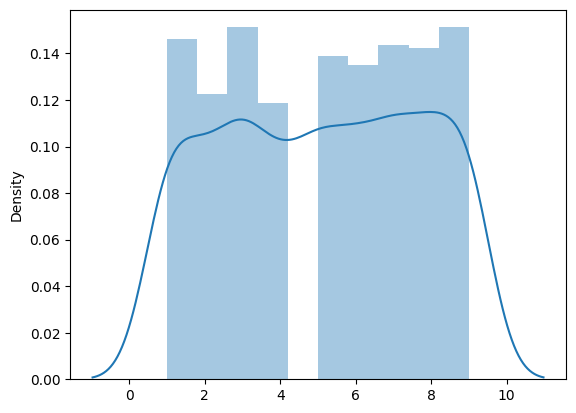

In [17]:
sns.distplot(X)

In [18]:
new_x = scaler.fit_transform(X)

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\498632918.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_x)


<Axes: ylabel='Density'>

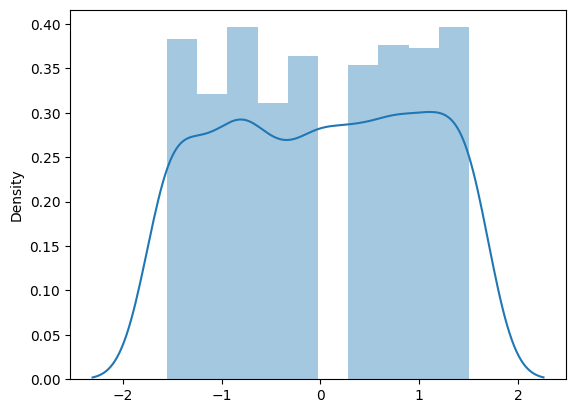

In [19]:
sns.distplot(new_x)

**Lưu ý**: Với các nhóm hàm biến đổi dữ liệu trước khi vào mô hình, frame work bao giờ cũng như sau:

- Tạo object để transform `transfrom_object`
- Áp dụng hàm fit với object X
- Apply `transform_object` vào object mới Y

Trong trường hợp áp dụng thẳng fit và transform object X, ta có thể dùng hàm `fit_transform`

In [20]:
from sklearn.datasets import load_iris
iris_ml = load_iris()

In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris_ml.data, iris_ml.target, random_state = 0)
train_row = x_train.shape[0]
test_row = x_test.shape[0]

In [22]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler().fit(x_train[:,1].reshape(train_row, 1))

In [23]:
new_var = scl.transform(x_test[:, 1].reshape(test_row, 1))

**So sánh distribution của hai nhóm**

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\3139152922.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test[:, 1])


<Axes: ylabel='Density'>

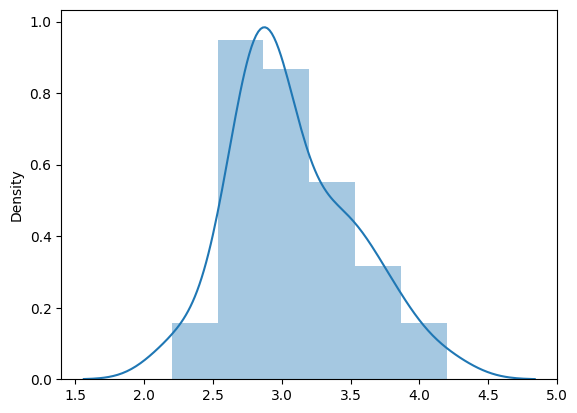

In [24]:
# Oldvar
sns.distplot(x_test[:, 1])

In [25]:
# New var
type(new_var)

numpy.ndarray

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\3763496867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_var)


<Axes: ylabel='Density'>

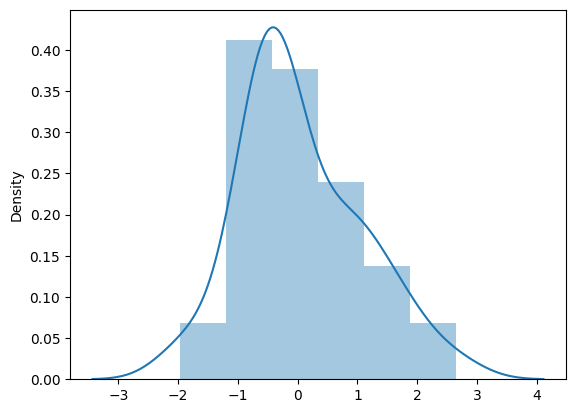

In [26]:
sns.distplot(new_var)

### Normalization

`Normalization` biến đổi dữ liệu trong khoảng `[0, 1]`

In [27]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train)

In [28]:
new_var = norm.transform(x_test)

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\2928076553.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_test[:, 1])


<Axes: ylabel='Density'>

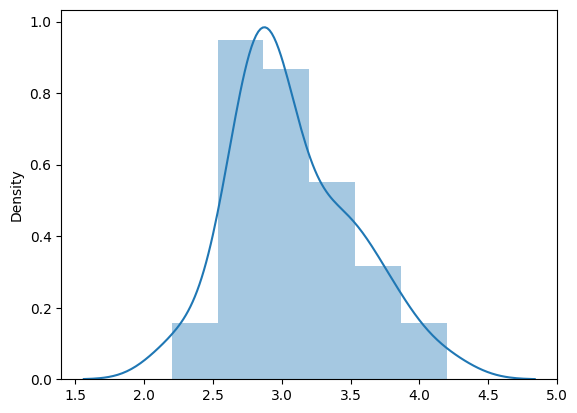

In [29]:
#Old var
sns.distplot(x_test[:, 1])

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\3666558095.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_var[:, 1])


<Axes: ylabel='Density'>

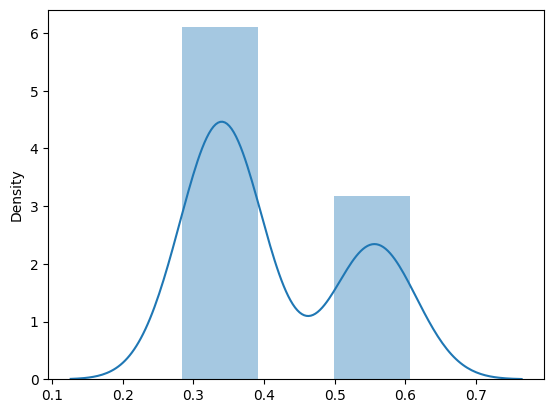

In [30]:
# New var
sns.distplot(new_var[:, 1])

In [31]:
new_var[:5]

array([[0.67767924, 0.32715549, 0.59589036, 0.28041899],
       [0.78892752, 0.28927343, 0.52595168, 0.13148792],
       [0.77867447, 0.59462414, 0.19820805, 0.02831544],
       [0.71366557, 0.28351098, 0.61590317, 0.17597233],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ]])

### Tạo hàm bậc cao

In [32]:
from sklearn.preprocessing import PolynomialFeatures
result = PolynomialFeatures(5).fit_transform(x_train)

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\3241549412.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[:, 1])


<Axes: ylabel='Density'>

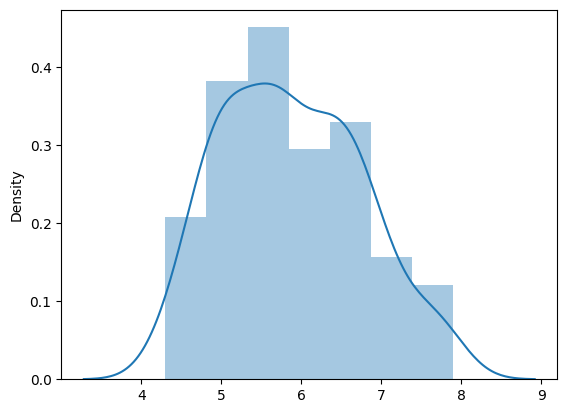

In [33]:
# New var
sns.distplot(result[:, 1])

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\342988524.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[:, 1])


<Axes: ylabel='Density'>

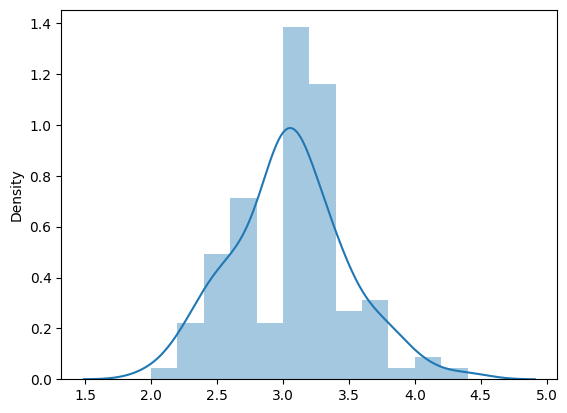

In [34]:
# Old var
sns.distplot(x_train[:, 1])

### MinMax scaler

In [35]:
from sklearn.preprocessing import MinMaxScaler
result = MinMaxScaler().fit_transform(x_train)

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\2067300990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[:, 1])


<Axes: ylabel='Density'>

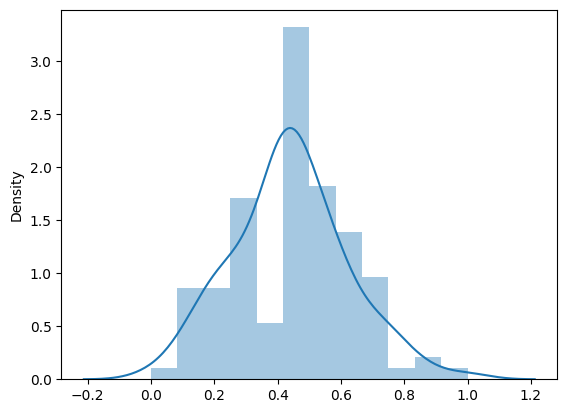

In [36]:
sns.distplot(result[:, 1])

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\1523832925.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[:, 1])


<Axes: ylabel='Density'>

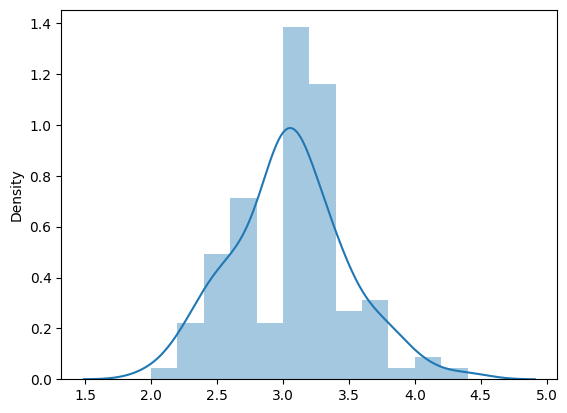

In [37]:
sns.distplot(x_train[:, 1])

### Robust scaling

Tương tự như StandardScaler, nhưng Robust Scaling sẽ thay `mean` bằng median

In [38]:
from sklearn.preprocessing import RobustScaler
result = RobustScaler().fit_transform(x_train)

C:\Users\anhhd3\AppData\Local\Temp\ipykernel_19024\2067300990.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(result[:, 1])


<Axes: ylabel='Density'>

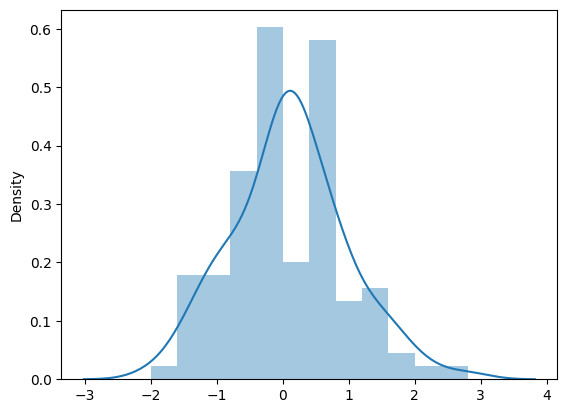

In [39]:
sns.distplot(result[:, 1])

## Biến category

### Onehot encoding

In [40]:
cat_var = np.array(['a', 'a', 'b', 'c', 'b'])
cat_var.reshape(5, 1)

array([['a'],
       ['a'],
       ['b'],
       ['c'],
       ['b']], dtype='<U1')

In [41]:
from sklearn.preprocessing import LabelEncoder
onehot = LabelEncoder()
onehot.fit_transform(cat_var)

array([0, 0, 1, 2, 1], dtype=int64)

## Chọn mô hình & phân tích kết quả

In [42]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(breast.data, breast.target, test_size = 0.3, random_state = 0)

In [45]:
from xgboost import XGBClassifier

In [46]:
xgb_model = XGBClassifier(probabbility = True)

In [47]:
xgb_model.fit(x_train, y_train)

[21:29:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "probabbility" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, probabbility=True, ...)

In [48]:
xgb_model.predict(x_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [49]:
# Dự báo xác suất
pred_prob = xgb_model.predict_proba(x_test)
pred_class = xgb_model.predict(x_test)
print(pred_prob[:5]); print(pred_class[:5])

[[9.9953926e-01 4.6076466e-04]
 [1.3533890e-02 9.8646611e-01]
 [2.9784441e-04 9.9970216e-01]
 [2.3810267e-03 9.9761897e-01]
 [2.5230646e-04 9.9974769e-01]]
[0 1 1 1 1]


In [50]:
from sklearn.metrics import *

In [51]:
accuracy_score(y_test, pred_class)

0.9649122807017544

In [52]:
confusion_matrix(y_test, pred_class)

array([[ 60,   3],
       [  3, 105]], dtype=int64)

In [53]:
print(classification_report(y_test, pred_class))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        63
           1       0.97      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [54]:
roc_auc_score(y_test, pred_prob[:, 1])

0.9980893592004704

`roc_curve` cho phép trả ra kết quả FPR & TPR và threshold

In [55]:
fpr, tpr, threshold = roc_curve(y_test, pred_prob[:, 1])

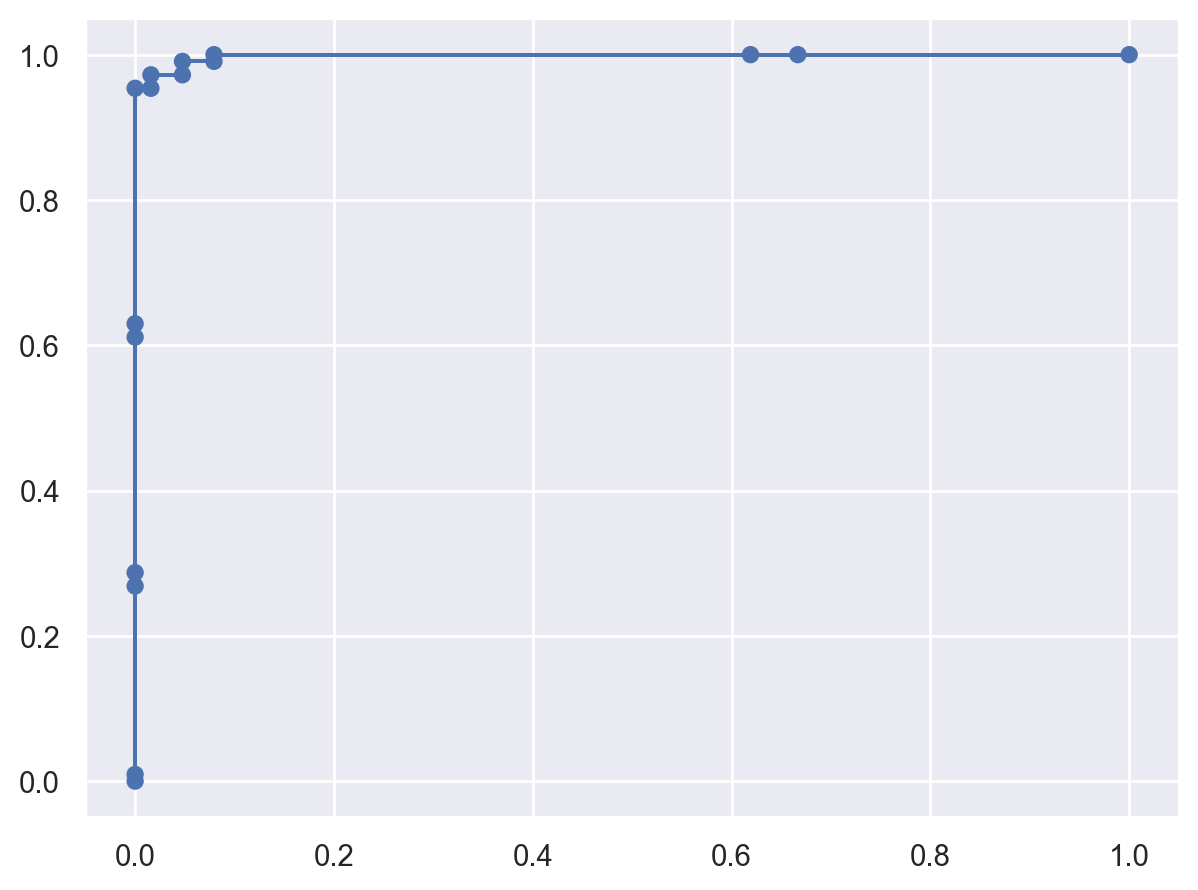

In [72]:
import seaborn.objects as so
so.Plot(fpr, tpr).add(so.Dot()).add(so.Line())

## Grid search

In [73]:
xgb_model = XGBClassifier()
from sklearn.model_selection import GridSearchCV

In [74]:
params = {"max_depth" : [3,4,5],
         "sample_rate" : [0.6, 0.7],
         "colsample_bytree" : [0.6, 0.8]}

In [75]:
grid = GridSearchCV(estimator = xgb_model,
                   param_grid = params,
                   scoring = "roc_auc",
                   cv = 5) # Số lượng cross-validation

In [76]:
grid.fit(x_train, y_train)

[21:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sample_rate" } are not used.

[21:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sample_rate" } are not used.

[21:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sample_rate" } are not used.

[21:37:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sample_rate" } are not used.

[21:37:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "sample_rate" } are not us

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8], 'max_depth': [3, 4, 5],
                         'sample_rate': [0.6, 0.7]},
             scoring='roc_auc')

In [77]:
grid.best_score_

0.9941205723668778

In [78]:
grid.best_params_

{'colsample_bytree': 0.6, 'max_depth': 3, 'sample_rate': 0.6}